Welcome to our <b> Palestine Car Price Prediction Machine learning project</b> using Deep Nueral Networks 

This Notebook will explain the work step by step

Lets Start and have Fun 

* for More details about Data and Cleaning process you can Visit our GitHub Repostry --> __[Graduation_project
](https://github.com/akramAssi/graduation_projects)__ 

* also you Can Fork our Mobile Application in This Repostry --> __[SOUQY
](https://github.com/akramAssi/souqy)__ 




# Setup
First, let's import all needed Library,

In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
import tensorflow as tf
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
!pip install missingpy

     |████████████████████████████████| 51kB 2.6MB/s 


This Code is used to read data from Google Drive Since the Project was execute in <b> Google Colab </b>

<i> You can igonre it if you want to run in yout Device </i>

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [4]:
#2.1 Get the file
downloaded = drive.CreateFile({'id':'1ScpDZ8saukAJ60rg3VDbaOM7CSXZBHfQ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Complete.xlsx') 


Code Start Frome here 

1. Load The data

In [5]:
MyData = pd.read_excel('Complete.xlsx',parse_dates = ['ad_date'])
MyData

,make,model,type,passenger,year,price,color,fuel,history,gear,engine_size,Kilometers,owners,ad_date,payment_method,windows,url,alarm,ac,radio_cd,sunroof,leatherـchair,centralـLock,magnesium_wheels,air_bag,Days_Live
0,Volkswagen,Passat,sedan,5,1999,28500,dark blue,petrol,private,automatic,1600,NaN,NaN,2016-09-20,cash,electric,https://shobiddak.com/cars/432099,1,1,0,1,0,1,0,0,6472
1,Volkswagen,Passat,sedan,5,2001,43000,gray,petrol,private,automatic,1600,100000.0,2.0,2016-09-20,cash,electric,https://shobiddak.com/cars/432100,1,1,1,0,0,1,0,1,5741
2,hyundai,Accent,sedan,5,2014,68000,white,petrol,private,automatic,1500,45000.0,0.0,2016-09-20,cash,WindM,https://shobiddak.com/cars/432104,1,1,1,0,1,1,1,1,993
3,kia,Pride(rio),__sedan/hatch__,5,2008,49000,silver,diesel,private,manual,1500,NaN,NaN,2016-09-20,cash,electric,https://shobiddak.com/cars/432105,1,1,1,0,0,1,1,1,3185
4,BMW,3 Series,sedan,5,1986,30000,blue,petrol,private,manual,1600,NaN,10.0,2016-09-19,cash,electric,https://shobiddak.com/cars/432107,1,0,1,1,1,1,1,0,11219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200474,Mercedes,Vario,truck,7,1996,70000,white,diesel,Commercial,manual,110,NaN,4.0,2017-11-11,cash,WindM,https://shobiddak.com/cars/517019,0,1,1,0,1,1,0,0,7985
200475,Mercedes,C-Class,sedan,5,2002,50000,brown,diesel,taxi,automatic,2200,NaN,NaN,2021-02-09,installment,electric,https://shobiddak.com/cars/679985,0,1,1,0,1,1,1,1,7184
200476,Mercedes,Sprinter,van,7,1989,25000,white,diesel,private,manual,3000,NaN,1.0,2018-09-26,cash,WindM,https://shobiddak.com/cars/570091,0,0,0,0,0,0,0,0,10860
200477,Mercedes,Atego,truck,3,1996,85000,white,diesel,Commercial,manual,170,NaN,4.0,2017-02-07,cash,WindM,https://shobiddak.com/cars/463031,1,1,1,1,0,1,0,0,7853


In [6]:
MyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200479 entries, 0 to 200478
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   make              200479 non-null  object        
 1   model             200479 non-null  object        
 2   type              200479 non-null  object        
 3   passenger         200479 non-null  int64         
 4   year              200479 non-null  int64         
 5   price             200479 non-null  int64         
 6   color             200479 non-null  object        
 7   fuel              200479 non-null  object        
 8   history           200479 non-null  object        
 9   gear              200479 non-null  object        
 10  engine_size       200479 non-null  object        
 11  Kilometers        117432 non-null  float64       
 12  owners            149430 non-null  float64       
 13  ad_date           200479 non-null  datetime64[ns]
 14  paym

### from the previous block we Notice that:
* The Totall Number of Data is 200479 and the Totall number of Features is 26
* The Data is contain both Categorial and numeric value
* thers Some Missing Data in Some Column (Kilometers,owners)
* There's Some Dtype for some column(engine_size,owners,km) needed to change ---> `Note: This step will be delayed until we Fill the Missing Data`
  
  
  
  

##### `So based in This Information we will Do some Preparation on Data To be Ready`

  * Delete Some unncessary Column
  * As a step for prepare Categrical Data before Visualize and use it we Make a string in each column with one Format and delete the space by strip( )
    * `For example "BMW and bmw" must be One World`
  * Now we must deal with Numeric Data and impute Missing Data on it
  * Correct wrong dtype  

<b> Lets start with Steps </b>

In [7]:
MyData.pop("ad_date")
MyData.pop("url")

0         https://shobiddak.com/cars/432099
1         https://shobiddak.com/cars/432100
2         https://shobiddak.com/cars/432104
3         https://shobiddak.com/cars/432105
4         https://shobiddak.com/cars/432107
                        ...                
200474    https://shobiddak.com/cars/517019
200475    https://shobiddak.com/cars/679985
200476    https://shobiddak.com/cars/570091
200477    https://shobiddak.com/cars/463031
200478    https://shobiddak.com/cars/481989
Name: url, Length: 200479, dtype: object

<b>Categorical Data,</b> 

`make column` <b>,</b>
`model column`<b>,</b>
`type column` <b>,</b>
`color column` <b>,</b>
`history column` <b>,</b> 
`gear column`<b>,</b>
`payment_methoud` <b>,</b>
`fuel column` <b>,</b>
`window column`

In [8]:
print("Number of Uniqe Data in Make Column Before Edit: ",len(MyData.make.unique()))
MyData.make = MyData.make.str.lower()
MyData.make = MyData.make.str.strip()
MyData.make.unique()
print("Number of Uniqe Data in Make Column After Edit: ",len(MyData.make.unique()))

Number of Uniqe Data in Make Column Before Edit:  85
Number of Uniqe Data in Make Column After Edit:  66


In [9]:
print("Number of Uniqe Data in Model Column Before Edit: ",len(MyData.model.unique()))
MyData.model = MyData.model.str.lower()
MyData.model = MyData.model.str.strip()
MyData.model.unique()
print("Number of Uniqe Data in Model Column After Edit: ",len(MyData.model.unique()))

Number of Uniqe Data in Model Column Before Edit:  621
Number of Uniqe Data in Model Column After Edit:  565


In [10]:
print("Number of Uniqe Data in Type Column Before Edit: ",len(MyData.type.unique()))
MyData.type = MyData.type.str.lower()
MyData.type = MyData.type.str.strip()
MyData.type.unique()
print("Number of Uniqe Data in Type Column After Edit: ",len(MyData.type.unique()))

Number of Uniqe Data in Type Column Before Edit:  19
Number of Uniqe Data in Type Column After Edit:  13


In [11]:
print("Number of Uniqe Data in Color Column Before Edit: ",len(MyData.color.unique()))
MyData.color = MyData.color.str.lower()
MyData.color = MyData.color.str.strip()
MyData.color.unique()
print("Number of Uniqe Data in Color Column After Edit: ",len(MyData.color.unique()))

Number of Uniqe Data in Color Column Before Edit:  18
Number of Uniqe Data in Color Column After Edit:  15


In [12]:
print("Number of Uniqe Data in History Column Before Edit: ",len(MyData.history.unique()))
MyData.history = MyData.history.str.lower()
MyData.history = MyData.history.str.strip()
MyData.history.unique()
print("Number of Uniqe Data in History Column After Edit: ",len(MyData.history.unique()))

Number of Uniqe Data in History Column Before Edit:  7
Number of Uniqe Data in History Column After Edit:  6


In [13]:
print("Number of Uniqe Data in Gear-Type Column Before Edit: ",len(MyData.gear.unique()))
MyData.gear = MyData.gear.str.lower()
MyData.gear = MyData.gear.str.strip()
MyData.gear.unique()
print("Number of Uniqe Data in Gear-Type Column After Edit: ",len(MyData.gear.unique()))

Number of Uniqe Data in Gear-Type Column Before Edit:  3
Number of Uniqe Data in Gear-Type Column After Edit:  2


In [14]:
print("Number of Uniqe Data in Payment-Method Column Before Edit: ",len(MyData.payment_method.unique()))
MyData.payment_method = MyData.payment_method.str.lower()
MyData.payment_method = MyData.payment_method.str.strip()
MyData.payment_method.unique()
print("Number of Uniqe Data in Payment-Method Column Before Edit: ",len(MyData.payment_method.unique()))

Number of Uniqe Data in Payment-Method Column Before Edit:  3
Number of Uniqe Data in Payment-Method Column Before Edit:  2


In [15]:
print("Number of Uniqe Data in fuel-Type Column Before Edit: ",len(MyData.fuel.unique()))
MyData.fuel = MyData.fuel.str.lower()
MyData.fuel = MyData.fuel.str.strip()
MyData.fuel.unique()
print("Number of Uniqe Data in fuel-Type Column After Edit: ",len(MyData.fuel.unique()))

Number of Uniqe Data in fuel-Type Column Before Edit:  3
Number of Uniqe Data in fuel-Type Column After Edit:  3


In [16]:
print("Number of Uniqe Data in windows Column Before Edit: ",len(MyData.windows.unique()))
MyData.windows = MyData.windows.str.lower()
MyData.windows = MyData.windows.str.strip()
MyData.windows.unique()
print("Number of Uniqe Data in windows Column After Edit: ",len(MyData.windows.unique()))

Number of Uniqe Data in windows Column Before Edit:  2
Number of Uniqe Data in windows Column After Edit:  2


As a step beofre start impleamt the Model we Must :

* Encode the Categorical Data
* impute the Missing Data 
* Corroct the wrong Dtype in the MyData frame


In [17]:
def get_cols_with_no_nans(df,col_type):
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude=['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include=['object'])
    elif (col_type == 'all'):
        predictors = df
    else :
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [18]:
num_cols = get_cols_with_no_nans(MyData , 'num')
cat_cols = get_cols_with_no_nans(MyData , 'no_num')

In [19]:
print ('Number of numerical columns with no nan values :',len(num_cols))
print ('Number of nun-numerical columns with no nan values :',len(cat_cols))

Number of numerical columns with no nan values : 12
Number of nun-numerical columns with no nan values : 9


In [20]:
# This Function was used to Encodet the Categorical Data using Dummey variable 
def dummies(x,df):
    temp = pd.get_dummies(df[x])
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the MyData

MyData = dummies('make',MyData)
MyData = dummies('model',MyData)
MyData = dummies('type',MyData)
MyData = dummies('color',MyData)
MyData = dummies('fuel',MyData)
MyData = dummies('history',MyData)
MyData = dummies('gear',MyData)
MyData = dummies('payment_method',MyData)
MyData = dummies('windows',MyData)

Now The Column for the Data will be increase since the Encosing was applay

In [21]:
MyData.shape

(200479, 688)

Now we have chieck for Column that have a Missing Data is follow to Fill it 


In [22]:
print(MyData.isna().sum())

passenger          0
year               0
price              0
engine_size        0
Kilometers     83047
               ...  
manual             0
cash               0
installment        0
electric           0
windm              0
Length: 688, dtype: int64


Thers a Missing Data in some Column so we Must fill it 

Thers a lot of different Techniqe that can we used to fill the Missing data:
* Median imputation
* Mean imputation
* Mode imputation
* MissForest imputation

<b> Note: Documantion contain the Comparesion between all imputations </b>

###### ` So after applay all previous Techniqe , we Notice That MissForest will give the best imputation and less MAE`
######  <b>To applay the MissForest Techniqe , Theres Some conditions we must do the most important thing that Categorical Data must be encoded</b>
So lets start applaying this Methoud:
* Firstly, we must applay Encoded Techniqe in Categorical Data. `Done previous`
* Secandly,we Must split the Target value from the Data to avoid Data Leakage problem
* Thirdly we perform the imputation in all Data. Then we create a new columns to use this imputation to fill Missing Data on it.
* Finally, we Delete The the Columns that contines Missing Data

In [23]:
Target = MyData.pop('price')
MyData

,passenger,year,engine_size,Kilometers,owners,alarm,ac,radio_cd,sunroof,leatherـchair,centralـLock,magnesium_wheels,air_bag,Days_Live,alfaromeo,aprilia,audi,austin,bmc,bmw,buick,cadillac,casa,case,caterpillar,chevrolet,chrysler,citroen,dacia,daewoo,daf,daihatsu,dodge,fassi,fiat,ford,gilera,gmc,hammer,harley-davidson,...,hatch,heavy truck,minivan,motorcycle,pickup,sedan,suv,tractor,truck,van,beige,black,blue,brown,dark blue,gold,gray,green,orange,other,purple,red,silver,white,yallow,diesel,hybrid,petrol,commercial,gov,private,rental,school,taxi,automatic,manual,cash,installment,electric,windm
0,5,1999,1600,NaN,NaN,1,1,0,1,0,1,0,0,6472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
1,5,2001,1600,100000.0,2.0,1,1,1,0,0,1,0,1,5741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,5,2014,1500,45000.0,0.0,1,1,1,0,1,1,1,1,993,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1
3,5,2008,1500,NaN,NaN,1,1,1,0,0,1,1,1,3185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0
4,5,1986,1600,NaN,10.0,1,0,1,1,1,1,1,0,11219,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200474,7,1996,110,NaN,4.0,0,1,1,0,1,1,0,0,7985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1
200475,5,2002,2200,NaN,NaN,0,1,1,0,1,1,1,1,7184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0
200476,7,1989,3000,NaN,1.0,0,0,0,0,0,0,0,0,10860,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1
200477,3,1996,170,NaN,4.0,1,1,1,1,0,1,0,0,7853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1


In [24]:
%%time
from missingpy import  MissForest
# Make an instance and perform the imputation
imputer = MissForest()
X_imputed = imputer.fit_transform(MyData)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
CPU times: user 4h 5min 9s, sys: 26.2 s, total: 4h 5min 35s
Wall time: 1h 3min 10s


In [25]:
MyData['MF_kilometers'] = X_imputed[:, 3]
MyData['MF_owners'] = X_imputed[:, 4]

In [26]:
# Now we Can Delete (Kilometers,owners) Columns , Since theres 2 alternative Column
MyData.drop("Kilometers",axis=1,inplace=True)
MyData.drop("owners",axis=1,inplace=True)

In [27]:
MyData["engine_size"] = MyData["engine_size"].astype("int64")
MyData["MF_kilometers"] = MyData["MF_kilometers"].astype("int64")
MyData["MF_owners"] = MyData["MF_owners"].astype("int64")
MyData["passenger"] = MyData["passenger"].astype("int64")

In [28]:
MyData.reset_index(drop=True, inplace=True)
Target.reset_index(drop=True, inplace=True)

Data = pd.concat([MyData, Target], axis=1)

In [29]:
Data
print("Data Contain all Features with Target Feature after Concat")

Data Contain all Features with Target Feature after Concat


In [30]:
# We Split The Data into 2 sets (train,test)
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(Data, train_size = 0.7, test_size = 0.3, random_state = 42)
print("The len of the Train_set size is ---->",len(df_train))
print("The len of the Test_set size is ---->",len(df_test))

The len of the Train_set size is ----> 140335
The len of the Test_set size is ----> 60144


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['passenger','year','price','engine_size','MF_kilometers','MF_owners','Days_Live']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])


In [32]:

y_train = df_train.pop('price')
X_train = df_train

In [33]:
y_test = df_test.pop('price')
X_test = df_test

Now Data was ready and we can do Keras Model implemantion as follow....
* build the Model with exprimanted number of (layer,Node)
* Define a Model Checkpoint to know where the best value that Model acceve
* Fit the prepred Model 
* draw the learning Curve and Find the Evaluotin for Model to know its behaviour and try to Tuninng its paramter
* define a early stoping Technique to know the best Number of Epoch that Model need

* Compere DNN Model with another Model to find whose best 





`Lest's start step by step`

In [34]:
def Build_Model():
  NN_model = Sequential()

  # The Input Layer :
  # NN_model.add(Dense(32, kernel_initializer='normal', activation='relu'))

  #random_uniform

  # The Hidden Layers :
  NN_model.add(Dense(8,kernel_initializer='normal',activation='relu',input_dim = X_train.shape[1],kernel_regularizer=tf.keras.regularizers.L2(0.0001)))
  NN_model.add(Dense(4, kernel_initializer='normal',activation='relu',kernel_regularizer=tf.keras.regularizers.L2(0.0001)))
  # NN_model.add(Dense(4, kernel_initializer='normal',activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.0005)))
  # NN_model.add(Dense(4, kernel_initializer='normal',activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.0005)))

  NN_model.add(tf.keras.layers.Dropout(0.001))

  # The Output Layer :
  NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

  opt = tf.keras.optimizers.Adam(learning_rate=0.0001)


  # Compile the network :
  NN_model.compile(loss='mean_absolute_error', metrics=['mean_absolute_error'], optimizer=opt)
  NN_model.summary()

  return NN_model


In [35]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]


In [36]:
model = Build_Model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 5504      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout (Dropout)            (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 5,545
Trainable params: 5,545
Non-trainable params: 0
_________________________________________________________________


In [37]:
%%time
history = model.fit(X_train, y_train, epochs=500, batch_size=16, validation_split = 0.3,callbacks=callbacks_list)

Epoch 1/500
6140/6140 [==============================] - 16s 2ms/step - loss: 0.0300 - mean_absolute_error: 0.0294 - val_loss: 0.0136 - val_mean_absolute_error: 0.0130

Epoch 00001: val_loss improved from inf to 0.01362, saving model to Weights-001--0.01362.hdf5
Epoch 2/500
6140/6140 [==============================] - 11s 2ms/step - loss: 0.0128 - mean_absolute_error: 0.0122 - val_loss: 0.0110 - val_mean_absolute_error: 0.0104

Epoch 00002: val_loss improved from 0.01362 to 0.01104, saving model to Weights-002--0.01104.hdf5
Epoch 3/500
6140/6140 [==============================] - 10s 2ms/step - loss: 0.0110 - mean_absolute_error: 0.0103 - val_loss: 0.0106 - val_mean_absolute_error: 0.0099

Epoch 00003: val_loss improved from 0.01104 to 0.01056, saving model to Weights-003--0.01056.hdf5
Epoch 4/500
6140/6140 [==============================] - 10s 2ms/step - loss: 0.0105 - mean_absolute_error: 0.0098 - val_loss: 0.0103 - val_mean_absolute_error: 0.0096

Epoch 00004: val_loss improved fro

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch
hist.columns

Index(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error',
       'epoch'],
      dtype='object')

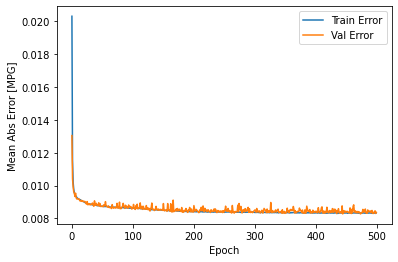

---------------------------------------------------------------------------------------------
Overview for the Curve:-
* The number of train_size ----> 0.7 and validation split is ----> 0.3
* Normalization ----> MinMax Scaler
* Number of hidden layer is ---> (2) --> First layer(8) , Secand layer(4) with kernal_intalizer is (normal)
* batch Size was ---> 16
* The number of epoch is ------> 500
* the Dropout was applay with 0.001
* we use ---> kernel_regularizer=tf.keras.regularizers.L2(0.0001)
* we Modify the learning rate to ---> 0.0001
* mean_absolute_error is used for loss Function


In [39]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch 

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
plt.legend()
plt.ylim()
plt.show()
print("---------------------------------------------------------------------------------------------")
print("Overview for the Curve:-")
print("* The number of train_size ----> 0.7 and validation split is ----> 0.3")
print("* Normalization ----> MinMax Scaler")
print("* Number of hidden layer is ---> (2) --> First layer(8) , Secand layer(4) with kernal_intalizer is (normal)")
print("* batch Size was ---> 16")
print("* The number of epoch is ------> 500")
print("* the Dropout was applay with 0.001")
print("* we use ---> kernel_regularizer=tf.keras.regularizers.L2(0.0001)")
print("* we Modify the learning rate to ---> 0.0001")
print("* mean_absolute_error is used for loss Function")

In [40]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [55]:
print("Model Evaluotion was goes Here:")
print(" * The Mean absolute error is ",mean_absolute_error(y_test,predictions))
print(" * The Mean squared error is ",mean_squared_error(y_test,predictions))
print(" * The Value for R2 is ",r2_score(y_test,predictions))

Model Evaluotion was goes Here:
 * The Mean absolute error is  0.008308978575214919
 * The Mean squared error is  0.00022651828306520917
 * The Value for R2 is  0.9228742486157027


In [47]:
import keras
class PrintDot(keras.callbacks.Callback):
 def on_epoch_end(self, epoch, logs):
   if epoch % 100 == 0: print('') 
   print('.', end='') 

EPOCHS = 1000 

history = model.fit( X_train, y_train, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[PrintDot()]) 



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 8)                 5504      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 36        
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 5,545
Trainable params: 5,545
Non-trainable params: 0
_________________________________________________________________

.................................................................................................

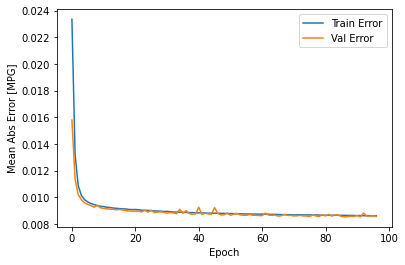

In [56]:
import keras
model = Build_Model()
# The patience parameter is the amount of epochs to check for improvement 
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10) 
history = model.fit(X_train, y_train, epochs=500, validation_split = 0.2, verbose=0, callbacks=(early_stop, PrintDot()))

hist = pd.DataFrame(history.history)
hist['epoch']=history.epoch

plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
plt.legend()
plt.ylim()
plt.show()

From the previos earlly Stoping Plot we noticed that Model become stable and doesnt improve after 100 epoch , so 100 epoch is very good

Finally , we want to do a prediction on it as follow..

<b> Make prediction and plot the Result as follow</b>

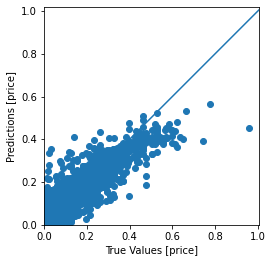

In [63]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions) 
plt.xlabel('True Values [price]') 
plt.ylabel('Predictions [price]') 
plt.axis('equal') 
plt.axis('square') 
plt.xlim([0,plt.xlim()[1]]) 
plt.ylim([0,plt.ylim()[1]]) 
_ = plt.plot([-100, 100], [-100, 100]) 



In [64]:
print("Model Evaluotion was goes Here:")
print(" * The Mean absolute error is ",mean_absolute_error(y_test,test_predictions))
print(" * The Mean squared error is ",mean_squared_error(y_test,test_predictions))
print(" * The Value for R2 is ",r2_score(y_test,test_predictions))

Model Evaluotion was goes Here:
 * The Mean absolute error is  0.008528241357541008
 * The Mean squared error is  0.00024464433006721864
 * The Value for R2 is  0.9167026276068386


<b> Lets draw the plot for Error as follow </b>

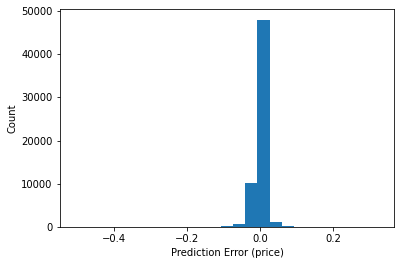

In [62]:
error = test_predictions - y_test 

plt.hist(error, bins = 25) 
plt.xlabel("Prediction Error (price)") 
_ = plt.ylabel("Count") 
